In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Data: Beijing PM2.5 Data Data Set
## Predicting Next Day Pollution Using RNN Model
This hourly data set contains the PM2.5 data of US Embassy in Beijing.

Source: https://archive.ics.uci.edu/dataset/381/beijing+pm2+5+data

In [2]:
# import datset and show top five instances
df = pd.read_csv('PRSA_data_2010.1.1-2014.12.31.csv')

# show top five instances
df.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0


In [3]:
# create new column 'Date' by concatenating 'Month', 'Day', and 'Year' columns
df['Date'] = df['month'].astype(str) + '/' + df['day'].astype(str) + '/' + df['year'].astype(str)
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')
df.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,Date
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0,2010-01-01
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0,2010-01-01
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0,2010-01-01
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0,2010-01-01
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0,2010-01-01


In [4]:
# aggregate dataset to at the day level by averaging values of pm2.5, DEWP, TEMP, PRES, lws, ls, lr

daily_data = df.groupby('Date')[['pm2.5', 'DEWP', 'TEMP', 'PRES', 'Iws', 'Is', 'Ir']].mean().reset_index()

daily_data.head()

,Date,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir
0,2010-01-01,NaN,-18.750000,-6.750000,1017.083333,14.458333,0.000000,0.0
1,2010-01-02,145.958333,-8.500000,-5.125000,1024.750000,24.860000,0.708333,0.0
2,2010-01-03,78.833333,-10.125000,-8.541667,1022.791667,70.937917,14.166667,0.0
3,2010-01-04,31.333333,-20.875000,-11.500000,1029.291667,111.160833,0.000000,0.0
4,2010-01-05,42.458333,-24.583333,-14.458333,1033.625000,56.920000,0.000000,0.0


In [5]:
# rename columns and show the first 5 rows to Date, Pollution, Dew, Temp, Press, Wind_spd, Snow, Rain

daily_data = daily_data.rename(columns={'No': 'Date', 'pm2.5': 'Pollution', 'DEWP': 'Dew', 'TEMP': 'Temp', 'PRES': 'Press', 'Iws': 'Wind_spd', 'Is': 'Snow', 'Ir': 'Rain'})

daily_data.head()

,Date,Pollution,Dew,Temp,Press,Wind_spd,Snow,Rain
0,2010-01-01,NaN,-18.750000,-6.750000,1017.083333,14.458333,0.000000,0.0
1,2010-01-02,145.958333,-8.500000,-5.125000,1024.750000,24.860000,0.708333,0.0
2,2010-01-03,78.833333,-10.125000,-8.541667,1022.791667,70.937917,14.166667,0.0
3,2010-01-04,31.333333,-20.875000,-11.500000,1029.291667,111.160833,0.000000,0.0
4,2010-01-05,42.458333,-24.583333,-14.458333,1033.625000,56.920000,0.000000,0.0


In [6]:
# change Date column to datetime and show data types

daily_data['Date'] = pd.to_datetime(daily_data['Date'])
daily_data.dtypes


Date         datetime64[ns]
Pollution           float64
Dew                 float64
Temp                float64
Press               float64
Wind_spd            float64
Snow                float64
Rain                float64
dtype: object

In [7]:
# sort by Date and show head

df.sort_values(by='Date').head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,Date
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0,2010-01-01
23,24,2010,1,1,23,NaN,-17,-5.0,1020.0,cv,0.89,0,0,2010-01-01
22,23,2010,1,1,22,NaN,-17,-5.0,1018.0,NW,2.68,0,0,2010-01-01
21,22,2010,1,1,21,NaN,-17,-5.0,1018.0,NW,1.79,0,0,2010-01-01
20,21,2010,1,1,20,NaN,-17,-5.0,1017.0,cv,0.89,0,0,2010-01-01


In [8]:
# show number of missing values
print("Number of missing values in each column:")
print(daily_data.isnull().sum())

Number of missing values in each column:
Date          0
Pollution    37
Dew           0
Temp          0
Press         0
Wind_spd      0
Snow          0
Rain          0
dtype: int64


In [10]:
# forward imputation for missing Pollution values, skip the first data instance on 2010-01-01

daily_data['Pollution'].fillna(method='ffill', inplace=True)

data_subset = daily_data[(daily_data['Date'] >= '2010-01-02') & (daily_data['Date'] <= '2014-12-31')]

print(data_subset)

           Date   Pollution        Dew       Temp        Press    Wind_spd  \
1    2010-01-02  145.958333  -8.500000  -5.125000  1024.750000   24.860000   
2    2010-01-03   78.833333 -10.125000  -8.541667  1022.791667   70.937917   
3    2010-01-04   31.333333 -20.875000 -11.500000  1029.291667  111.160833   
4    2010-01-05   42.458333 -24.583333 -14.458333  1033.625000   56.920000   
5    2010-01-06   56.416667 -23.708333 -12.541667  1033.750000   18.511667   
...         ...         ...        ...        ...          ...         ...   
1821 2014-12-27  238.666667  -9.666667  -1.791667  1027.833333    9.278333   
1822 2014-12-28  197.375000 -10.791667   1.583333  1019.958333   10.948750   
1823 2014-12-29  159.000000 -12.333333   0.750000  1013.750000    8.000000   
1824 2014-12-30   46.083333 -13.916667   1.875000  1019.125000    9.778333   
1825 2014-12-31   10.041667 -21.791667  -1.916667  1032.125000  167.458333   

           Snow  Rain  
1      0.708333   0.0  
2     14.166667

In [11]:
# print the total number of data points
print(len(daily_data))

1826


In [12]:
# drop the first data and print again
daily_data.drop(daily_data.index[0], inplace=True)
print(len(daily_data))

1825


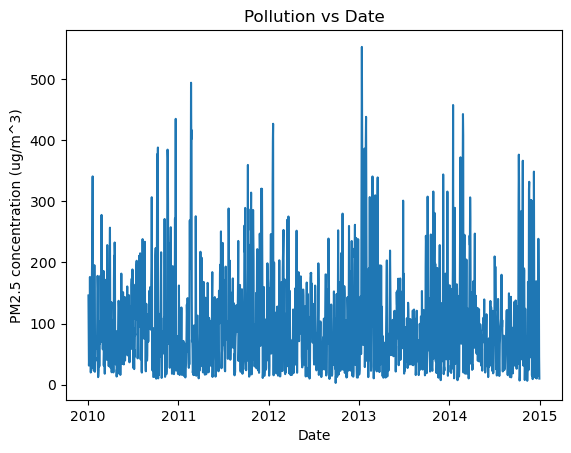

In [13]:
# plot Pollution vs Date, Pollution is measured in ug/m3 using matplotlib
plt.plot(daily_data['Date'], daily_data['Pollution'])
plt.xlabel('Date')
plt.ylabel('PM2.5 concentration (ug/m^3)')
plt.title('Pollution vs Date')
plt.show()

In [14]:
# split into train and test data
train_data = daily_data[daily_data['Date'] < '2014-01-01']
test_data = daily_data[daily_data['Date'] >= '2014-01-01']
print("Train size:", len(train_data))
print("Test size:", len(test_data))

Train size: 1460
Test size: 365


In [15]:
# scaling the data using min-max scaler
from sklearn.preprocessing import MinMaxScaler

x_columns = ['Pollution', 'Dew', 'Temp', 'Press', 'Wind_spd', 'Snow', 'Rain']
y_column = ['Pollution']

x_train = train_data[x_columns]
y_train = train_data[y_column]
x_test = test_data[x_columns]
y_test = test_data[y_column]

scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)
y_train_scaled = scaler.fit_transform(y_train)
y_test_scaled = scaler.transform(y_test)

print(pd.DataFrame(x_train_scaled).head(10))

          0         1         2         3         4     5    6
0  0.260227  0.353261  0.197183  0.621417  0.050624  0.05  0.0
1  0.138075  0.322981  0.125000  0.581788  0.150425  1.00  0.0
2  0.051636  0.122671  0.062500  0.713322  0.237544  0.00  0.0
3  0.071881  0.053571  0.000000  0.801012  0.120063  0.00  0.0
4  0.097282  0.069876  0.040493  0.803541  0.036874  0.00  0.0
5  0.120181  0.115683  0.041373  0.810287  0.018807  0.00  0.0
6  0.315275  0.192547  0.058099  0.687184  0.001053  0.00  0.0
7  0.155666  0.207298  0.112676  0.708263  0.025584  0.00  0.0
8  0.098798  0.214286  0.120599  0.778246  0.034501  0.00  0.0
9  0.031012  0.125776  0.121479  0.815346  0.087067  0.00  0.0


In [16]:
# top 10 instances of y_train

print(pd.DataFrame(y_train_scaled).head(10))

          0
0  0.260227
1  0.138075
2  0.051636
3  0.071881
4  0.097282
5  0.120181
6  0.315275
7  0.155666
8  0.098798
9  0.031012


In [17]:
# Shifting data so the past 7 days of data are used to predict the next day's pollution

def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X[i:(i + time_steps)]
        Xs.append(v)
        ys.append(y[i + time_steps])
    return np.array(Xs), np.array(ys)

time_steps = 7

x_train_shifted, y_train_shifted = create_dataset(x_train_scaled, y_train_scaled, time_steps)
print(x_train_shifted.shape)


(1453, 7, 7)


In [18]:
print(y_train_shifted.shape)

(1453, 1)


In [19]:
print(x_train_shifted[0])

[[0.26022714 0.35326087 0.1971831  0.62141653 0.05062437 0.05
  0.        ]
 [0.13807507 0.32298137 0.125      0.58178752 0.15042465 1.
  0.        ]
 [0.05163598 0.12267081 0.0625     0.71332209 0.23754358 0.
  0.        ]
 [0.07188092 0.05357143 0.         0.8010118  0.12006321 0.
  0.        ]
 [0.09728188 0.06987578 0.04049296 0.80354132 0.03687449 0.
  0.        ]
 [0.12018066 0.11568323 0.04137324 0.81028668 0.01880726 0.
  0.        ]
 [0.31527519 0.19254658 0.05809859 0.68718381 0.00105317 0.
  0.        ]]


In [20]:
y_train_shifted[0]

array([0.15566618])

# Model

In [21]:
from keras.models import Sequential
from keras.layers import GRU, Dense

model = Sequential()
model.add(GRU(50, return_sequences=True, input_shape=(x_train_shifted.shape[1], x_train_shifted.shape[2])))
model.add(GRU(100))
model.add(Dense(1))

2023-08-19 12:23:27.989115: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-19 12:23:30.043983: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [22]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [23]:
history = model.fit(
    x_train_shifted, y_train_shifted,
    epochs=10,
    batch_size=16,
    validation_split=0.1,
    shuffle=False
)

Epoch 1/10
82/82 [==============================] - 4s 13ms/step - loss: 0.0232 - mae: 0.1164 - val_loss: 0.0174 - val_mae: 0.1070
Epoch 2/10
82/82 [==============================] - 1s 6ms/step - loss: 0.0208 - mae: 0.1092 - val_loss: 0.0329 - val_mae: 0.1535
Epoch 3/10
82/82 [==============================] - 0s 6ms/step - loss: 0.0186 - mae: 0.1012 - val_loss: 0.0157 - val_mae: 0.1031
Epoch 4/10
82/82 [==============================] - 1s 6ms/step - loss: 0.0145 - mae: 0.0909 - val_loss: 0.0163 - val_mae: 0.1037
Epoch 5/10
82/82 [==============================] - 0s 6ms/step - loss: 0.0141 - mae: 0.0899 - val_loss: 0.0161 - val_mae: 0.1024
Epoch 6/10
82/82 [==============================] - 0s 6ms/step - loss: 0.0138 - mae: 0.0887 - val_loss: 0.0157 - val_mae: 0.1006
Epoch 7/10
82/82 [==============================] - 0s 6ms/step - loss: 0.0136 - mae: 0.0879 - val_loss: 0.0155 - val_mae: 0.0996
Epoch 8/10
82/82 [==============================] - 0s 5ms/step - loss: 0.0135 - mae: 0.0

## Performance

In [24]:
# Show the performance of the model on the test set
x_test_shifted, y_test_shifted = create_dataset(x_test_scaled, y_test_scaled, time_steps)
loss, mae = model.evaluate(x_test_shifted, y_test_shifted)

12/12 [==============================] - 0s 2ms/step - loss: 0.0156 - mae: 0.0942


## Post-analysis

46/46 [==============================] - 1s 2ms/step


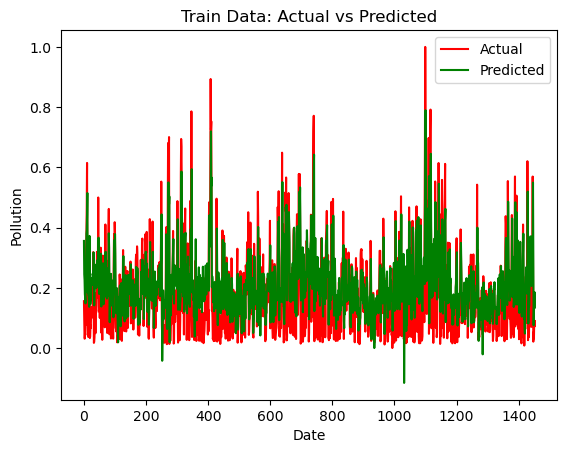

In [25]:
train_predictions = model.predict(x_train_shifted)
plt.plot(y_train_shifted, color = 'red') #actual
plt.plot(train_predictions, color = 'green') #predicted
plt.xlabel('Date')
plt.ylabel('Pollution')
plt.title('Train Data: Actual vs Predicted')
plt.legend(['Actual', 'Predicted'])
plt.show()


12/12 [==============================] - 0s 2ms/step


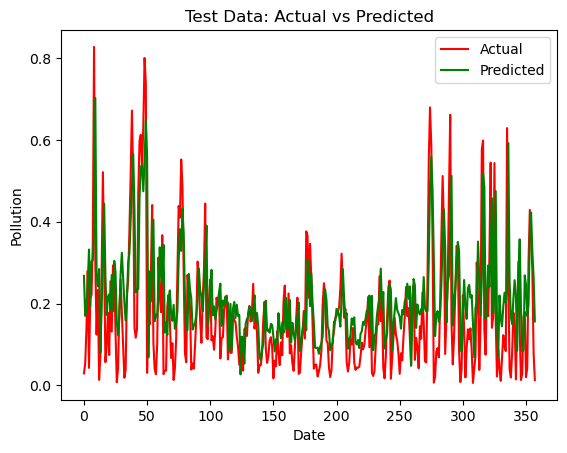

In [26]:
test_predictions = model.predict(x_test_shifted)
plt.plot(y_test_shifted, color = 'red')
plt.plot(test_predictions, color = 'green')
plt.xlabel('Date')
plt.ylabel('Pollution')
plt.title('Test Data: Actual vs Predicted')
plt.legend(['Actual', 'Predicted'])
plt.show()
